# Importing Dataset:
# https://www.kaggle.com/datasets/arashnic/game-review-dataset

In this dataset, under train_gt there exists a csv file called train.csv. Columns are review_id, title, year, user_review, user_suggestion. The "X" value will be user_review. This will be a user's review of a game in text. The "y" value will be user_suggestion. This will be if the review of the game is positive or negative (1 or 0). The other columns are discarded. The purpose is to determine a review's score from some review text.

In [3]:
import pandas as pd
df = pd.read_csv('train.csv', header=0, usecols=[3, 4], encoding='latin-1')
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (17494, 2)
                                         user_review  user_suggestion
0  I'm scared and hearing creepy voices.  So I'll...                1
1  Best game, more better than Sam Pepper's YouTu...                1
2  A littly iffy on the controls, but once you kn...                1
3  Great game, fun and colorful and all that.A si...                1
4  Not many games have the cute tag right next to...                1


# Text Preprocessing:

In [4]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# # Initialize the TF-IDF vectorizer with stop word out
vectorizer = TfidfVectorizer(stop_words='english')

In [6]:
X = df.user_review
y = df.user_suggestion

In [7]:
X.head()

0    I'm scared and hearing creepy voices.  So I'll...
1    Best game, more better than Sam Pepper's YouTu...
2    A littly iffy on the controls, but once you kn...
3    Great game, fun and colorful and all that.A si...
4    Not many games have the cute tag right next to...
Name: user_review, dtype: object

In [8]:
print(y[:10])

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: user_suggestion, dtype: int64


# Spliting the data
Split the data into train and test sets. 20% of the data going to the test set.

In [9]:
from sklearn.model_selection import train_test_split
# Split 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print(X_train.shape)
print(X_test.shape)

(13995,)
(3499,)


In [10]:
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [11]:
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (13995, 47176)
test size: (3499, 47176)


# Step 0. Graph

<ipython-input-12-33cf0e8d6230>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_suggestion', data=df, palette="Set2")


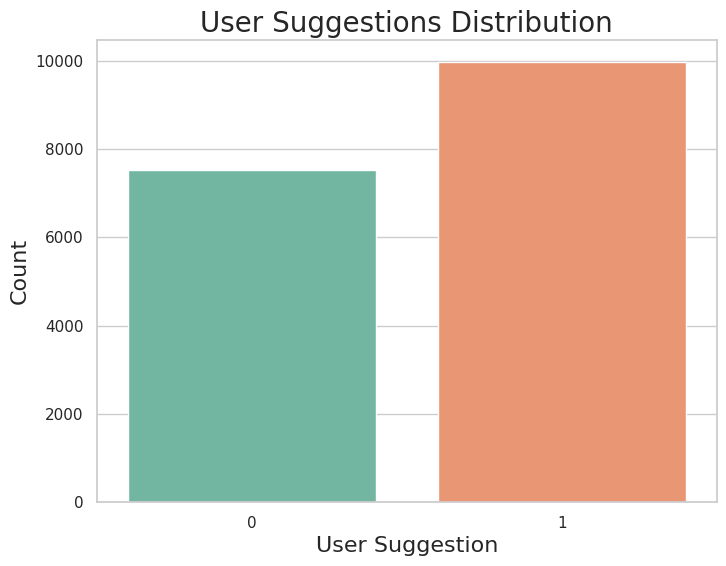

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set(style="whitegrid")


# Adjust the figure size
plt.figure(figsize=(8, 6))

# Adjust the color palette
sns.countplot(x='user_suggestion', data=df, palette="Set2")

# Change font size for x-axis and label
plt.xlabel('User Suggestion', fontsize=16)
# Change font size for y-axis and label
plt.ylabel('Count', fontsize=16)

# Increase font size for title
plt.title('User Suggestions Distribution', fontsize=20)

plt.show()


# Step 1. Naive Bayes

## First Try

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [14]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [15]:
# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

[[ 870  608]
 [ 103 1918]]


## Confusion matrix has this form
##     TruePositive   FalsePositive
##     FalseNegative   TrueNegative

In [16]:
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.7967990854529866


Accuracy of 79.7% which is pretty good, but lets examine our negative cases a bit more.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1478
           1       0.76      0.95      0.84      2021

    accuracy                           0.80      3499
   macro avg       0.83      0.77      0.78      3499
weighted avg       0.82      0.80      0.79      3499



In [18]:
print('negative review size in test data:',y_test[y_test==1].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test==1].shape[0] / y_test.shape[0]
print(baseline)

negative review size in test data: 2021
test size:  3499
0.5775935981709059


## The positive review are 57% of the test data, which indicates that the NaiveBayes method did learn.

## Let's examine some falsely classified data.

In [19]:
y_test[y_test != pred]

1458     1
10913    0
3041     0
9005     0
15471    0
        ..
15694    0
8426     0
7466     0
8501     0
3750     1
Name: user_suggestion, Length: 711, dtype: int64

In [20]:
for i in [1458, 10913, 3041, 9005, 15471, 15694, 8426]:
  print(df.loc[i, 'user_review'])
  print()

Early Access ReviewMostly its a good game however in my last 2 games ive had a rather annoying bug where my cannons refuse to fire at all until i die, other then that a very interesting game.Edit: Sometimes mt abilities dont work now and i cannot connect to a game anymore, wtf?2nd edit: And i believe the game has a hacker problem as well from what ive witnessed and heard.Edit 3: Fix the damn game now, ITS KEEPS F****** CRASHING

Early Access ReviewDevelopers pushing stuff that could've been designed by their little cousin, because they can sell a mini campaign with a buy-in super pushed creature removable mostly by its own colors. Makes the ladder, which is bo1, a mind numbingly boring experience, since almost everyone and their dog wanting to climb plays that card either because it's good, or because the same colors are needed to remove it.Can't wait till someone wants to make money by making a good card game, rather than make money with dubious "buy this powercreep here guise" type d

## Second Try: using re.sub to get rid/change some text

In [21]:
df['user_review'].replace(r'^Early Access Review', '', regex=True, inplace=True)

In [22]:
for i in [1458, 10913, 3041, 9005, 15471, 15694, 8426]:
  print(df.loc[i, 'user_review'])
  print()

Mostly its a good game however in my last 2 games ive had a rather annoying bug where my cannons refuse to fire at all until i die, other then that a very interesting game.Edit: Sometimes mt abilities dont work now and i cannot connect to a game anymore, wtf?2nd edit: And i believe the game has a hacker problem as well from what ive witnessed and heard.Edit 3: Fix the damn game now, ITS KEEPS F****** CRASHING

Developers pushing stuff that could've been designed by their little cousin, because they can sell a mini campaign with a buy-in super pushed creature removable mostly by its own colors. Makes the ladder, which is bo1, a mind numbingly boring experience, since almost everyone and their dog wanting to climb plays that card either because it's good, or because the same colors are needed to remove it.Can't wait till someone wants to make money by making a good card game, rather than make money with dubious "buy this powercreep here guise" type deals. Shame because there's obviously 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [24]:
# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

[[ 879  599]
 [ 108 1913]]


This didn't change anything, lets do some more substitution.

In [25]:
df['user_review'].replace('[\d][\d]+', ' num ', regex=True, inplace=True)
df['user_review'].replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
df['user_review'].replace('[A-Z][A-Z]+', ' caps ', regex=True, inplace=True)

for i in [1458, 10913, 3041, 9005, 15471, 15694, 8426]:
  print(df.loc[i, 'user_review'])
  print()

Mostly its a good game however in my last 2 games ive had a rather annoying bug where my cannons refuse to fire at all until i die, other then that a very interesting game.Edit: Sometimes mt abilities dont work now and i cannot connect to a game anymore, wtf?2nd edit: And i believe the game has a hacker problem as well from what ive witnessed and heard.Edit 3: Fix the damn game now,  caps   caps  F punct   caps 

Developers pushing stuff that could've been designed by their little cousin, because they can sell a mini campaign with a buy-in super pushed creature removable mostly by its own colors. Makes the ladder, which is bo1, a mind numbingly boring experience, since almost everyone and their dog wanting to climb plays that card either because it's good, or because the same colors are needed to remove it.Can't wait till someone wants to make money by making a good card game, rather than make money with dubious "buy this powercreep here guise" type deals. Shame because there's obvious

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [27]:
# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

[[ 858  620]
 [ 106 1915]]


## Previous:
## [[ 879  599]
## [ 108 1913]]

### Increase False Positive by 21 but increase false negative by 2. Overall slight decrease in accuracy. Lets scrap this idea and move on to a different approach.

In [28]:
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.7925121463275222


## Third Try: Using Binomial

In [29]:
# Reset the data from the second try
df = pd.read_csv('train.csv', header=0, usecols=[3, 4], encoding='latin-1')


In [30]:
# binary=True gives binary data instead of counts
vectorizer_b = TfidfVectorizer(stop_words='english', binary=True)

# set up X and y
X = vectorizer_b.fit_transform(df.user_review)
y = df.user_suggestion

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=49)

In [31]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes2 = BernoulliNB()
naive_bayes2.fit(X_train, y_train)

BernoulliNB()

In [32]:
# make predictions on the test data
pred = naive_bayes2.predict(X_test)

# print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 945,  533],
       [ 181, 1840]])

In [33]:
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.7959416976278937


This actually decreased the accuracy. Decrease FP, but increase FN.

In [34]:
naive_bayes3 = BernoulliNB(alpha=1, binarize=0.05, fit_prior=False)
naive_bayes3.fit(X_train, y_train)

BernoulliNB(alpha=1, binarize=0.05, fit_prior=False)

In [35]:
# make predictions on the test data
pred = naive_bayes3.predict(X_test)

# print confusion matrix
confusion_matrix(y_test, pred)

print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8093741068876822


After playing with the parameters for a little bit, I got the accuracy to above 80 percent.

# Step 2. Logistic Regression


In [36]:
df = pd.read_csv('train.csv', header=0, usecols=[3, 4], encoding='latin-1')
X = df.user_review
y = df.user_suggestion

# Split 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [37]:
from sklearn.linear_model import LogisticRegression

#training the regression
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [38]:
# evaluate
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

# print confusion matrix
print(confusion_matrix(y_test, pred))

accuracy score:  0.8588168048013718
[[1277  201]
 [ 293 1728]]


## Trying Pipelines

In [39]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

pipe1 = Pipeline([
  ('tfidf', TfidfVectorizer(binary=True)),
  ('logreg', LogisticRegression(solver='lbfgs', class_weight='balanced')),
])

pipe1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(binary=True)),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [40]:
prediction = pipe1.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, prediction))

accuracy score:  0.8588168048013718


In [41]:
# to check all the parameters of the pipeline, do this:
pipe1.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer(binary=True)),
  ('logreg', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'tfidf': TfidfVectorizer(binary=True),
 'logreg': LogisticRegression(class_weight='balanced'),
 'tfidf__analyzer': 'word',
 'tfidf__binary': True,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'logreg__C': 1.0,
 'logreg__class_weight': 'balanced',
 'logreg__dual': False,
 'logreg__fit_intercept': True,
 'logreg__intercept_scaling': 1,
 'logreg

## Trying some parameters

In [42]:
pipe1.set_params(tfidf__min_df=3, logreg__C=2.0).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.86024578450986


In [43]:
pipe1.set_params(tfidf__min_df=4, logreg__C=3.0, tfidf__smooth_idf = False).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8628179479851386


In [44]:
pipe1.set_params(tfidf__min_df=4, logreg__C=3.0).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8628179479851386


In [45]:
pipe1.set_params(tfidf__min_df=4, logreg__C=3.0, logreg__intercept_scaling=2).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8628179479851386


In [46]:
pipe1.set_params(tfidf__min_df=4, logreg__C=3.0, logreg__intercept_scaling=10).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8628179479851386


In [47]:
pipe1.set_params(tfidf__min_df=10, logreg__C=3.0, logreg__intercept_scaling=2).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8593883966847671


In [48]:
pipe1.set_params(tfidf__min_df=5, logreg__C=3.0, logreg__intercept_scaling=2).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8613889682766505


In [49]:
pipe1.set_params(tfidf__min_df=4, logreg__C=4.0, logreg__intercept_scaling=2).fit(X_train, y_train)
pred = pipe1.predict(X_test)
print("accuracy: ", accuracy_score(y_test, pred))

accuracy:  0.8619605601600457


After some light testing, These parameters [tfidf__min_df=4, logreg__C=3.0, tfidf__smooth_idf = False] had the highest accuracy. However the increase in accuracy was minimal


# Step 3. Neural Network


In [50]:
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('train.csv', header=0, usecols=[3, 4], encoding='latin-1')
X = df.user_review
y = df.user_suggestion

# Split 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data



In [51]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')

In [52]:
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.5775935981709059


## Trying other parameters

In [60]:
# Change the activation function
classifier = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(50, 2), random_state=1, activation='tanh')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8336667619319805


In [63]:
# Change the activation function
classifier = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(50, 2), random_state=1, activation='logistic')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.5775935981709059


In [64]:
# Change the activation function
classifier = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(50, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8399542726493284


In [67]:
# Lets choose activation function = identity
# Change alpha
classifier = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(50, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8379537010574449


In [69]:
# Change alpha
classifier = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(50, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8396684767076308


In [72]:
# Change solver
classifier = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(50, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.817947985138611


This takes too long, lets abandon this solver

In [73]:
# Change solver
classifier = MLPClassifier(solver='sgd', alpha=0.001, hidden_layer_sizes=(50, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8611031723349528


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


This takes even LONGER (more than 10 mins to run to completion). Will stick to 'lbfgs'

In [75]:
# Change solver
classifier = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(40, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8405258645327236


In [76]:
# Change solver
classifier = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(30, 2), random_state=1, activation='identity')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8382394969991426


# Conclusion

Overall, the best performing metric was Logistic Regression, followed by the best performing Neural Network, and the worst performing metric was Naive Bayes.

For Naive Bayes, I tested Multinomial and Binomial parameters. Surprisingly, the Multinomical parameter was more accurate which defied the initial hypothesis that the Binomial would produce higher accuracy. Cleaning the data did not help the performance at all.

Using logistic regression, we used pipeline to find the most accurate parameters. After some testing, these parameters, (tfidf__min_df=4, logreg__C=4.0, logreg__intercept_scaling=2), were the most accurate ones.

For the neural network, while the most accurate solver was sgd, there was a massive tradeoff in execution time. It took sgd a little over 14 minutes to train! The 'adam' solver wasn't too much better since it took around 10 minutes to train. That's a lot of time compared to 'lbfgs' which took around 1 minute.
For activation, relu and logistic did not work well, with subpar accuracy. The activation functions that works well were identity and tanh, where identity is slightly more accurate. Testing alpha, it seems that alpha = 0.01 was the best performing one.